<a href="https://colab.research.google.com/github/anisdeladesela/Project/blob/main/House%20Pricing%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICING ANALYSIS

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('deep')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import data
train = pd.read_csv(r'C:\Users\user\OneDrive\Shift Academy\house-prices-advanced-regression-techniques\train.csv')

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Soal No.2

### **a. Tunjukkan analisa statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)**

In [ ]:
#1
#Deteksi Missing Value
train['SalePrice'].isnull().sum()
#Tidak ada missing value di variabel harga rumah

0

<AxesSubplot:xlabel='SalePrice'>

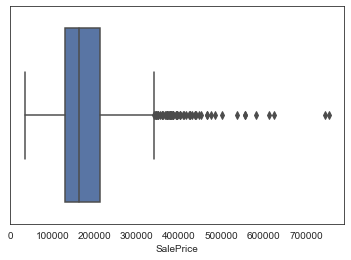

In [ ]:
#2
#Deteksi Outlier
sns.boxplot(train['SalePrice'])

In [ ]:
#3
#Membuat fungsi untuk mendeteksi outlier
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
    if number_outlier>0:
        print("  Outlier observation row:")
    else:
        pass
    out_list = []
    
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            out_list.append(i)
        elif sample[i]>upper_range:
            out_list.append(i) 
        else:
            pass
    if out_list != []:
        print(' ', out_list)

In [ ]:
outlier(train['SalePrice'])

- Number of Outlier From Variable SalePrice : 61
  Outlier observation row:
  [11, 53, 58, 112, 151, 161, 178, 185, 224, 231, 278, 309, 313, 320, 321, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 527, 585, 591, 608, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 987, 990, 1046, 1142, 1169, 1181, 1182, 1228, 1243, 1267, 1268, 1353, 1373, 1388, 1437]


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

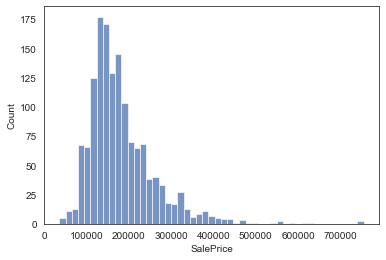

In [ ]:
#3
#Exploratory Analysis
sns.histplot(train['SalePrice'])

### **b. Tunjukkan analisa statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) untuk setiap tahunnya (Column name : YrSold)**

In [ ]:
#1
#Deteksi Missing Value
train['YrSold'].isnull().sum()
#Tidak ada missing value di variabel tahun

0

<AxesSubplot:xlabel='YrSold'>

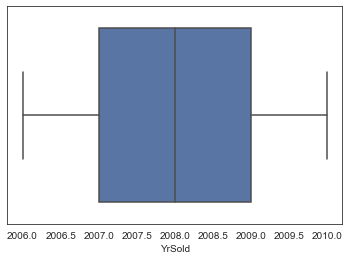

In [ ]:
#2
#Deteksi Outlier
sns.boxplot(train['YrSold'])
#Tidak ada outlier untuk variabel tahun

In [ ]:
#3
#Mendeskripsikan variabel tahun
train['YrSold'].describe()


#Tahun paling lama adalah tahun 2006
#Tahun paling baru adalah tahun 2010

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

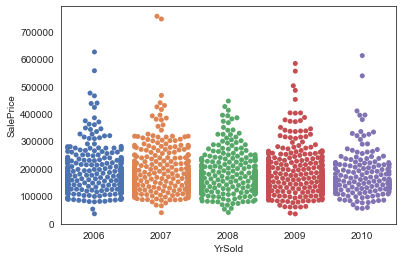

In [ ]:
#4
#Exploratory Data Analysis
sns.swarmplot(data = train, x = 'YrSold', y = 'SalePrice')

### **c. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot, tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)**

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


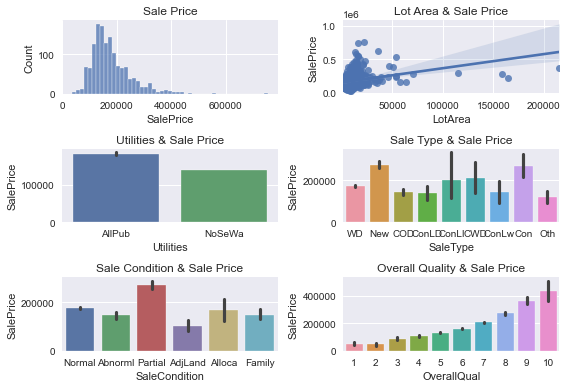

In [ ]:
plt.style.use('seaborn')

#1
plt.subplot(3,2,1)
sns.histplot(train['SalePrice'])
plt.title('Sale Price')

#1
#Lot Area dengan Sale Price
plt.subplot(3,2,2)
sns.regplot("LotArea", "SalePrice", data=train)
plt.title('Lot Area & Sale Price')

#3
#Utilities dengan Sale Price
plt.subplot(3,2,3)
sns.barplot(x = 'Utilities', y = 'SalePrice', data = train)
plt.title('Utilities & Sale Price')

#4
#Sale Type dengan Sale Price
plt.subplot(3,2,4)
sns.barplot(x = 'SaleType', y = 'SalePrice', data = train)
plt.title('Sale Type & Sale Price')

#5
#Sale Condition dengan Sale Price
plt.subplot(3,2,5)
sns.barplot(x = 'SaleCondition', y = 'SalePrice', data = train)
plt.title('Sale Condition & Sale Price')

#6
#Overall Quality
plt.subplot(3,2,6)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = train)
plt.title('Overall Quality & Sale Price')

plt.tight_layout()

In [ ]:
train.describe()['SalePrice']

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
print('Median dari data:')
train['SalePrice'].median()

Median dari data:


163000.0

Data rumah memiliki 61 outlier dari 1460 rows, selain itu data juga memiliki kemiringan (skewness) ke kanan (positif). Apabila menggunakan mean untuk menganalisa, dikhawatirkan outlier tersebut memengaruhi proses interpretasi analisis. Sehingga, untuk analisa lebih baik menggunakan median sebagai representasi keseluruhan data.

### **d. Lakukan pengujian hipotesis untuk harga rumah (Kolom: SalePrice). Untukmembuktikan apakah rata rata harga rumah pada tahun 2008 sama dengan rata rata harga rumah pada tahun 2009? (Kolom : YrSold)**

In [ ]:
#Rata-rata harga rumah
train.groupby(['YrSold']).mean()[['SalePrice']]

,SalePrice
YrSold,
2006,182549.458599
2007,186063.151976
2008,177360.838816
2009,179432.103550
2010,177393.674286


**LANGKAH 1**

**Membuat Hipotesis**

H0 : Rata-rata harga rumah pada tahun 2008 **sama dengan** rata-rata harga rumah pada tahun 2009

H1 : Rata-rata harga rumah pada tahun 2008 **berbeda** rata-rata harga rumah pada tahun 2009

alpha = 0.05

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#Split populasi untuk tahun 2008 dan tahun 2009
harga2008 = train[train['YrSold'] == 2008]
harga2009 = train[train['YrSold'] == 2009]

In [ ]:
harga2008

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,20,RL,80.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Abnorml,174000
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300


In [ ]:
harga2009

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
36,37,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

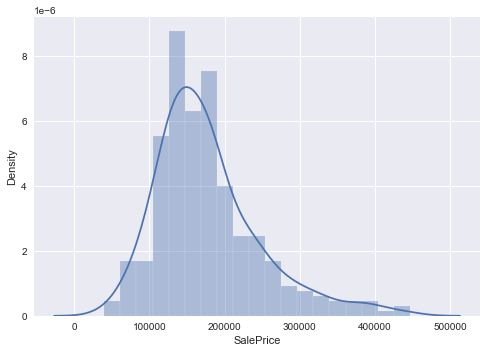

In [ ]:
#Melihat distribusi dari harga rumah di tahun 2008
sns.distplot(harga2008['SalePrice'])

#Data tahun 2008 skewed ke kanan (tidak berdistribusi normal)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

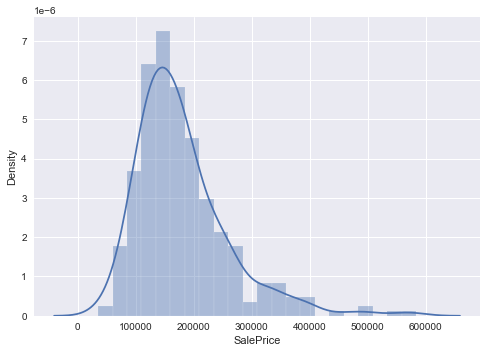

In [ ]:
#Melihat distribusi dari harga rumah di tahun 2009
sns.distplot(harga2009['SalePrice'])

#Data tahun 2009 skewed ke kanan (tidak berdistribusi normal)

Karena kedua populasi tidak memiliki distribusi normal, sehingga pengujian dengan teknik parametrik tidak digunakan. Pengujian hipotesis akan dilakukan dengan pengujian nonparametrik. Data yang digunakan juga cukup besar sehingga dapat menggunakan pengujian nonparametrik.

**LANGKAH 2**

**Mencari p-value**

In [ ]:
import scipy.stats as st

Pengujian yang digunakan adalah uji Mann-Whitney U Test sebagai uji alternatif nonparametrik untuk uji t beda dua populasi

In [ ]:
statistik_uji, pvalue = st.mannwhitneyu(x = harga2008['SalePrice'], y = harga2009['SalePrice'], alternative = 'two-sided')

In [ ]:
print('Nilai statistik uji :', statistik_uji)
print('Nilai p-value :', pvalue)

Nilai statistik uji : 52167.5
Nilai p-value : 0.736033655004268


**LANGKAH 3**

**Menarik Kesimpulan**

In [ ]:
if pvalue >= 0.05:
    print('H0 tidak ditolak')
    print('Tidak terdapat cukup bukti untuk menyatakan bahwa rata-rata harga rumah di tahun 2008 berbeda dengan rata-rata harga rumah di tahun 2009')
else:
    print('H0 ditolak')
    print('Terdapat cukup bukti untuk menolak H0, sehingga dapat dinyatakan bahwa rata-rata harga rumah di tahun 2008 berbeda dengan rata-rata harga rumah di tahun 2009')

H0 tidak ditolak
Tidak terdapat cukup bukti untuk menyatakan bahwa rata-rata harga rumah di tahun 2008 berbeda dengan rata-rata harga rumah di tahun 2009
